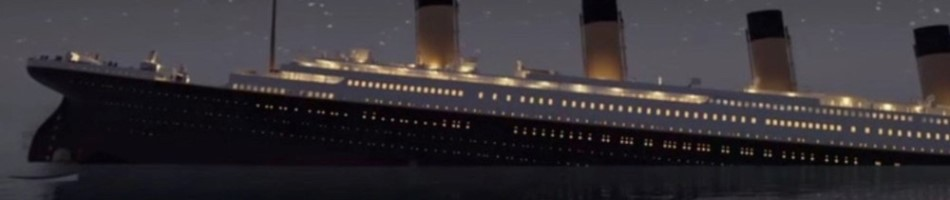

# Titanic - Machine Learning from Disaster

##Import Library

In [3]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from google.colab import files
uploaded = files.upload()


ModuleNotFoundError: No module named 'google.colab'

##Load Dataset

In [4]:
train_data = pd.read_csv('train.csv')
train_data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
test_data = pd.read_csv('test.csv')
test_data.head()

## Persentase survival rate perempuan

In [ ]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

## Persentase survival rate laki-laki

In [ ]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

## Initialize model nya

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd

# Assuming train_data and test_data are already loaded
y = train_data["Survived"]

features = ["Pclass", "Sex"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Initialize the model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)


## Validasi

In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Print cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation of accuracy: {cv_scores.std():.4f}")

# Fit the model on the entire training data
model.fit(X, y)

## Apply model ke test dataset

In [ ]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Prepare the output for submission
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

print("Your submission was successfully saved! in submission.csv")